### Real Estate Price Prediction

#### Fire the System

In [656]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [657]:
# importing data

df_fl = pd.read_csv('florida_homes.csv')
df_id = pd.read_csv('idaho_homes.csv')
df_vi = pd.read_csv('virginia homes.csv')

#### Data Exploration

In [658]:
df_fl.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,sqft,stories,baths,baths_full_calc,beds,garage,listPrice,url
0,single_family,NaN,Charming Brick Home in Sought-After Wedgefield...,for_sale,1990.0,NaN,1990-11-01,10454.0,2507.0,2.0,3.0,2.0,3.0,2.0,450000.0,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Welcome to this beautifully refreshed 3-bedroo...,for_sale,1978.0,NaN,2003-08-29,87120.0,1145.0,1.0,2.0,2.0,3.0,NaN,235000.0,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Charming home is situated in the highly sought...,for_sale,2006.0,NaN,2017-06-21,7405.0,1319.0,1.0,2.0,2.0,2.0,1.0,154900.0,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,"Foreclosure Auction Ends June 24, 2025 at 11:0...",for_sale,1962.0,NaN,2014-09-03,NaN,2633.0,1.0,2.0,2.0,4.0,2.0,200000.0,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"Nestled on 2 acres in the heart of San Mateo, ...",for_sale,1889.0,NaN,2016-09-16,87120.0,4624.0,3.0,9.0,6.0,7.0,2.0,399000.0,https://www.realtor.com/realestateandhomes-det...


In [659]:
df_fl.shape

(6572, 16)

In [660]:
df_fl.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'sqft', 'stories', 'baths', 'baths_full_calc',
       'beds', 'garage', 'listPrice', 'url'],
      dtype='object')

In [661]:
df_fl.isnull().sum()

type                  0
sub_type           5713
text                 14
status                0
year_built          907
year_renovated     6572
soldOn             2154
lot_sqft           1189
sqft                482
stories             905
baths               254
baths_full_calc     440
beds                435
garage             1569
listPrice             9
url                   0
dtype: int64

In [662]:
df_id.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,stories,baths,baths_full,baths_full_calc,beds,garage,listPrice,url
0,single_family,NaN,Although the home is likely a tear-down due to...,for_sale,1993.0,NaN,NaN,49223.0,1.0,3.0,3.0,3.0,3.0,2.0,324900.0,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Nestled on 2.25 serene acres just 45 minutes f...,for_sale,1996.0,NaN,2018-10-31,98010.0,2.0,5.0,2.0,2.0,4.0,2.0,575000.0,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Secret Garden on Bonners Ferry's S Hill- Quain...,for_sale,1903.0,NaN,2015-08-14,6098.0,2.0,1.0,1.0,1.0,2.0,1.0,325000.0,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,Alpine Model is available in 4 elevations; mod...,ready_to_build,NaN,NaN,NaN,NaN,1.0,NaN,2.0,2.0,4.0,2.0,475000.0,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"Craftsman single level home with shop, guest a...",for_sale,2008.0,NaN,2003-10-02,101930.0,1.0,2.0,2.0,2.0,2.0,2.0,769000.0,https://www.realtor.com/realestateandhomes-det...


In [663]:
df_id.shape

(6573, 16)

In [664]:
df_id.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'stories', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'garage', 'listPrice', 'url'],
      dtype='object')

In [665]:
df_id.isnull().sum()

type                  0
sub_type           6365
text                 31
status                0
year_built          917
year_renovated     6573
soldOn             3399
lot_sqft            279
stories            1314
baths                86
baths_full          736
baths_full_calc     723
beds                701
garage             1603
listPrice             1
url                   0
dtype: int64

In [666]:
df_vi.head()

,type,sub_type,text,status,year_built,year_renovated,soldOn,lot_sqft,sqft,stories,baths,baths_full,baths_full_calc,beds,garage_max,listPrice,garage_min,garage_type,url
0,single_family,NaN,"Welcome to this one-owner, brick split-level h...",for_sale,1987.0,NaN,NaN,27007.0,2237.0,3.0,3.0,2.0,2.0,3.0,NaN,299900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
1,single_family,NaN,Nestled in the lovely English Forest neighborh...,for_sale,1970.0,NaN,2013-09-19,10890.0,2504.0,1.0,2.0,2.0,2.0,3.0,NaN,249900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
2,single_family,NaN,Welcome home to this beautifully updated 3-bed...,for_sale,1988.0,NaN,NaN,217800.0,2441.0,1.0,2.0,2.0,2.0,3.0,NaN,377000.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
3,single_family,NaN,ESTATE AUCTION!!!! AUCTION!!!! AUCTION!!!! Cas...,for_sale,1978.0,NaN,NaN,479160.0,2425.0,2.0,5.0,4.0,4.0,3.0,NaN,350000.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...
4,single_family,NaN,"One-of-a-kind artisan-style 3 bed, 3 bath home...",for_sale,2000.0,NaN,2023-08-28,78844.0,2208.0,1.0,3.0,3.0,3.0,3.0,NaN,349900.0,NaN,NaN,https://www.realtor.com/realestateandhomes-det...


In [667]:
df_vi.shape

(6307, 19)

In [668]:
df_vi.columns

Index(['type', 'sub_type', 'text', 'status', 'year_built', 'year_renovated',
       'soldOn', 'lot_sqft', 'sqft', 'stories', 'baths', 'baths_full',
       'baths_full_calc', 'beds', 'garage_max', 'listPrice', 'garage_min',
       'garage_type', 'url'],
      dtype='object')

In [669]:
df_vi.isnull().sum()

type                  2
sub_type           5686
text                 65
status                0
year_built          770
year_renovated     6307
soldOn             2440
lot_sqft            674
sqft                640
stories            1161
baths                86
baths_full          643
baths_full_calc     643
beds                584
garage_max         6307
listPrice            18
garage_min         6307
garage_type        6307
url                   0
dtype: int64

#### Data Preprocessing

In [670]:
# Feature selection

df_fl = df_fl[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]
#df_id = df_id[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]
df_vi = df_vi[['type','status','year_built','soldOn','sqft','stories','baths','beds','listPrice']]

df_fl['state'] = 'Florida'
df_id['state'] = 'Idaho'
df_vi['state'] = 'Virginia'

df_fl.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1990.0,1990-11-01,2507.0,2.0,3.0,3.0,450000.0,Florida
1,single_family,for_sale,1978.0,2003-08-29,1145.0,1.0,2.0,3.0,235000.0,Florida
2,single_family,for_sale,2006.0,2017-06-21,1319.0,1.0,2.0,2.0,154900.0,Florida
3,single_family,for_sale,1962.0,2014-09-03,2633.0,1.0,2.0,4.0,200000.0,Florida
4,single_family,for_sale,1889.0,2016-09-16,4624.0,3.0,9.0,7.0,399000.0,Florida


In [671]:
df_vi.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1987.0,NaN,2237.0,3.0,3.0,3.0,299900.0,Virginia
1,single_family,for_sale,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
2,single_family,for_sale,1988.0,NaN,2441.0,1.0,2.0,3.0,377000.0,Virginia
3,single_family,for_sale,1978.0,NaN,2425.0,2.0,5.0,3.0,350000.0,Virginia
4,single_family,for_sale,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia


In [672]:
# concatinating 3 dataframes into one

df = pd.concat([df_vi,df_fl],axis=0)
df.head()

,type,status,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
0,single_family,for_sale,1987.0,NaN,2237.0,3.0,3.0,3.0,299900.0,Virginia
1,single_family,for_sale,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
2,single_family,for_sale,1988.0,NaN,2441.0,1.0,2.0,3.0,377000.0,Virginia
3,single_family,for_sale,1978.0,NaN,2425.0,2.0,5.0,3.0,350000.0,Virginia
4,single_family,for_sale,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia


In [673]:
df.shape

(12879, 10)

In [674]:
df.dtypes

type           object
status         object
year_built    float64
soldOn         object
sqft          float64
stories       float64
baths         float64
beds          float64
listPrice     float64
state          object
dtype: object

In [675]:
df.isnull().sum()

type             2
status           0
year_built    1677
soldOn        4594
sqft          1122
stories       2066
baths          340
beds          1019
listPrice       27
state            0
dtype: int64

In [676]:
df.nunique()

type            12
status           2
year_built     203
soldOn        4379
sqft          3741
stories         19
baths           20
beds            18
listPrice     2828
state            2
dtype: int64

In [677]:
df['type'].value_counts()

type
single_family                  10147
land                            1018
townhomes                        852
condos                           665
multi_family                      92
farm                              50
condo_townhome                    26
townhouse                         12
condo_townhome_rowhome_coop       12
condo                              1
duplex_triplex                     1
apartment                          1
Name: count, dtype: int64

In [678]:
df['status'].value_counts()

status
for_sale          12564
ready_to_build      315
Name: count, dtype: int64

In [679]:
#filtering the dataset

df = df[df['status'] == 'for_sale']
df = df[df['type'] == 'single_family']

df.shape

(9873, 10)

In [680]:
df['soldOn'] = pd.to_datetime(df['soldOn'],dayfirst=True)
df.dtypes

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16148\1688696545.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['soldOn'] = pd.to_datetime(df['soldOn'],dayfirst=True)


type                  object
status                object
year_built           float64
soldOn        datetime64[ns]
sqft                 float64
stories              float64
baths                float64
beds                 float64
listPrice            float64
state                 object
dtype: object

In [681]:
print(f'Earliest Sold on date: {df['soldOn'].min()}')
print(f'Latest Sold on date: {df['soldOn'].max()}')

Earliest Sold on date: 1954-10-08 00:00:00
Latest Sold on date: 2025-05-28 00:00:00


In [682]:
df = df[(df['soldOn'] >= '2005-01-01') & (df['soldOn'] < '2025-05-30')]
df.shape

(5834, 10)

In [683]:
df.isnull().sum()

type            0
status          0
year_built     41
soldOn          0
sqft           25
stories       350
baths           2
beds            0
listPrice       1
state           0
dtype: int64

In [684]:
# handling missing values and duplicales

df = df.dropna()
df = df.drop_duplicates()
df.shape

(5409, 10)

In [685]:
df = df.drop(['type','status'], axis=1) # dropping type and status columns as only one type of value was selected from both columns
df.head()

,year_built,soldOn,sqft,stories,baths,beds,listPrice,state
1,1970.0,2013-09-19,2504.0,1.0,2.0,3.0,249900.0,Virginia
4,2000.0,2023-08-28,2208.0,1.0,3.0,3.0,349900.0,Virginia
7,1974.0,2018-09-07,1756.0,1.0,2.0,3.0,450000.0,Virginia
8,1830.0,2018-05-01,2388.0,2.0,3.0,3.0,995000.0,Virginia
16,1991.0,2012-09-18,1695.0,2.0,2.0,4.0,380000.0,Virginia


#### Feature Engineering

In [686]:
# creating the feature of property_age

df['year_sold'] = df['soldOn'].dt.year.astype('float') # extracting only the year from the soldOn feature
df['property_age'] = df['year_sold'] - df['year_built']
df = df.drop(['year_built','year_sold','soldOn'],axis=1)
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age
1,2504.0,1.0,2.0,3.0,249900.0,Virginia,43.0
4,2208.0,1.0,3.0,3.0,349900.0,Virginia,23.0
7,1756.0,1.0,2.0,3.0,450000.0,Virginia,44.0
8,2388.0,2.0,3.0,3.0,995000.0,Virginia,188.0
16,1695.0,2.0,2.0,4.0,380000.0,Virginia,21.0


In [687]:
# creating price_per_lotsqft feature

df =df[df['sqft'] != 0]
df['price_per_sqft'] = df['listPrice']/df['sqft']
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age,price_per_sqft
1,2504.0,1.0,2.0,3.0,249900.0,Virginia,43.0,99.800319
4,2208.0,1.0,3.0,3.0,349900.0,Virginia,23.0,158.469203
7,1756.0,1.0,2.0,3.0,450000.0,Virginia,44.0,256.264237
8,2388.0,2.0,3.0,3.0,995000.0,Virginia,188.0,416.666667
16,1695.0,2.0,2.0,4.0,380000.0,Virginia,21.0,224.188791


In [688]:
# outlier removal based on price_per_sqft

def price_per_sqft_outliers(df):
    df_out = pd.DataFrame()
    for key,subdf in df.groupby('state'):
        mean = np.mean(subdf['price_per_sqft'])
        std = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] <= (mean + 3*std)) & (subdf['price_per_sqft'] > (mean - 3*std))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [689]:
df = price_per_sqft_outliers(df)
df.shape

(5321, 8)

In [690]:
# outlier removal based on inter quartile range

Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3 - Q1 # inter quartile range

df = df[(df['price_per_sqft'] > (Q1- 1.5*IQR)) & (df['price_per_sqft'] <= (Q3 + 1.5*IQR))]
df.shape

(4973, 8)

In [691]:
df['stories'].max()

5.0

In [692]:
# removing outliers based on unusual number of bathroom and bedrooms

df = df[(df['sqft'] > (df['baths']+df['beds'])*64)]
df.shape

(4973, 8)

In [693]:
df = df[~(df['baths'] > (df['beds'] +5))]
df.shape

(4973, 8)

In [694]:
df.head()

,sqft,stories,baths,beds,listPrice,state,property_age,price_per_sqft
0,1319.0,1.0,2.0,2.0,154900.0,Florida,11.0,117.437453
1,2633.0,1.0,2.0,4.0,200000.0,Florida,52.0,75.958982
2,4624.0,3.0,9.0,7.0,399000.0,Florida,127.0,86.288927
3,2531.0,1.0,4.0,4.0,572490.0,Florida,49.0,226.191229
4,1909.0,1.0,2.0,3.0,499900.0,Florida,23.0,261.864851


In [695]:
df['state'].value_counts()

state
Florida     2715
Virginia    2258
Name: count, dtype: int64

#### Data Visualization

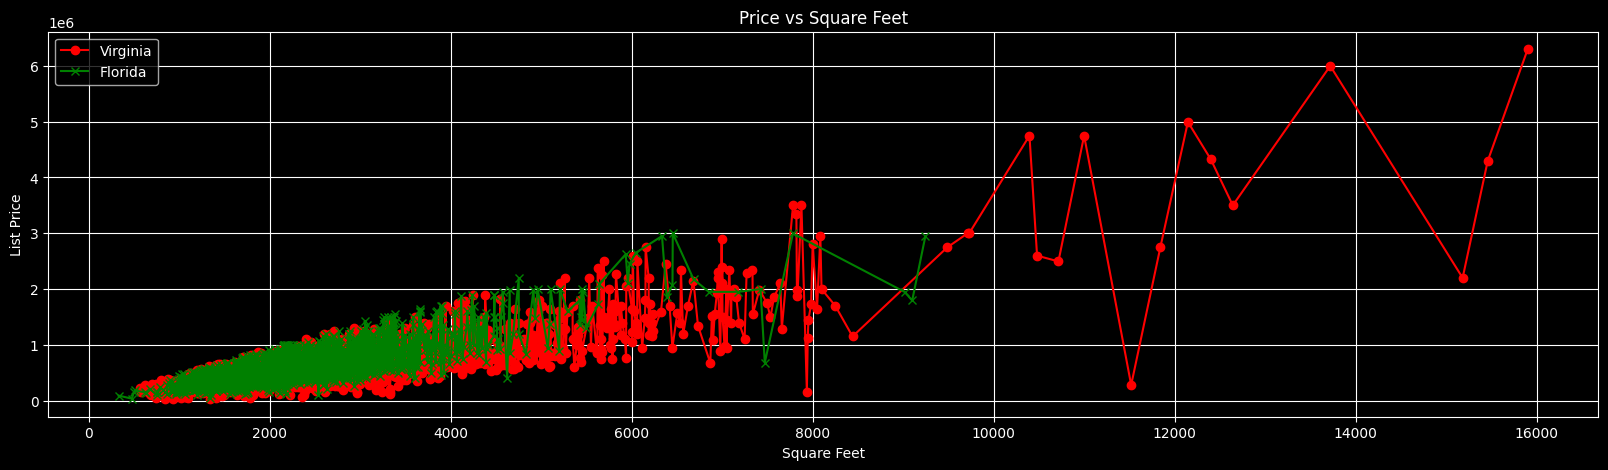

In [696]:
# visualizing sqft vs listprice

# Filter by state
df_vir = df[df['state'] == 'Virginia'].sort_values('sqft')
df_flo = df[df['state'] == 'Florida'].sort_values('sqft')

# Plotting
plt.figure(figsize=(20,5))
plt.plot(df_vir['sqft'], df_vir['listPrice'], label='Virginia', color='red', marker='o')
plt.plot(df_flo['sqft'], df_flo['listPrice'], label='Florida', color='green', marker='x')

plt.xlabel('Square Feet')
plt.ylabel('List Price')
plt.title('Price vs Square Feet')
plt.legend()
plt.grid(True)
plt.show()

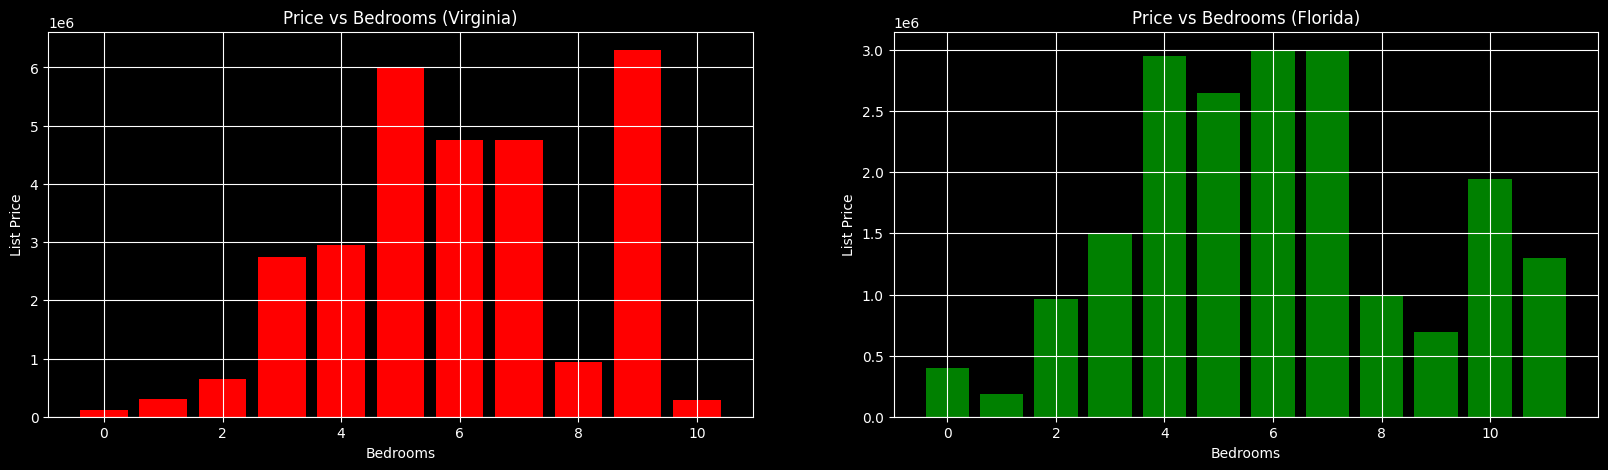

In [697]:
# visualizing bedrooms vs listprice

fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].bar(df_vir['beds'], df_vir['listPrice'], color='red')
axs[0].set_xlabel('Bedrooms')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Bedrooms (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['beds'], df_flo['listPrice'], color='green')
axs[1].set_xlabel('Bedrooms')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Bedrooms (Florida)')
axs[1].grid(True)


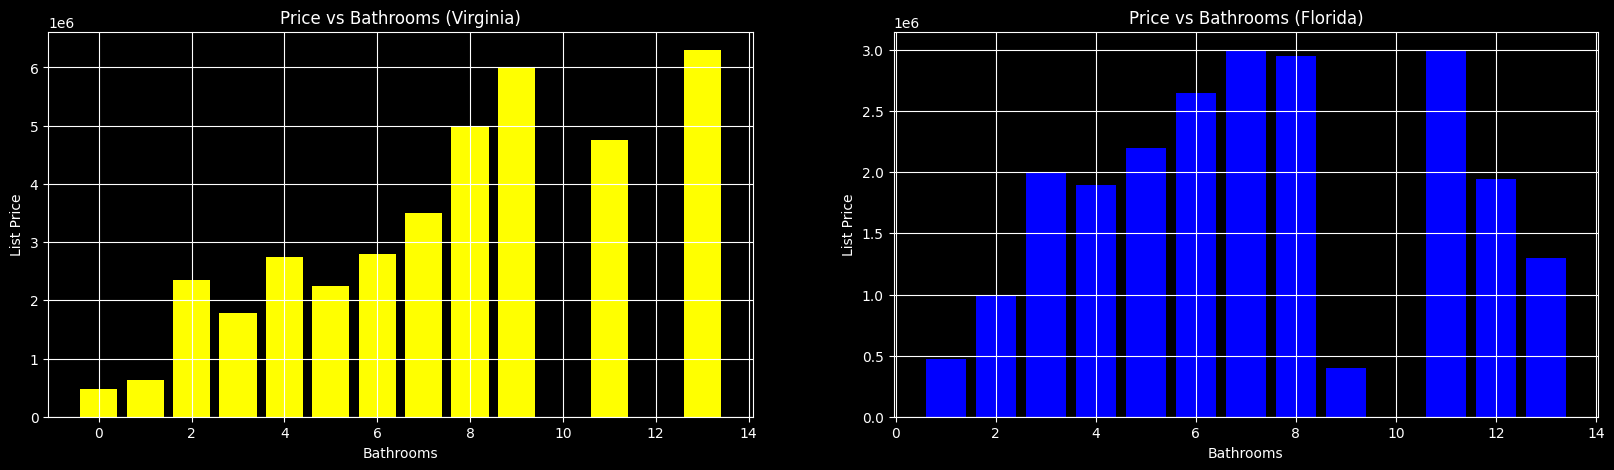

In [698]:
# visualizing bathrooms vs listprice

fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].bar(df_vir['baths'], df_vir['listPrice'], color='yellow')
axs[0].set_xlabel('Bathrooms')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Bathrooms (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['baths'], df_flo['listPrice'], color='blue')
axs[1].set_xlabel('Bathrooms')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Bathrooms (Florida)')
axs[1].grid(True)


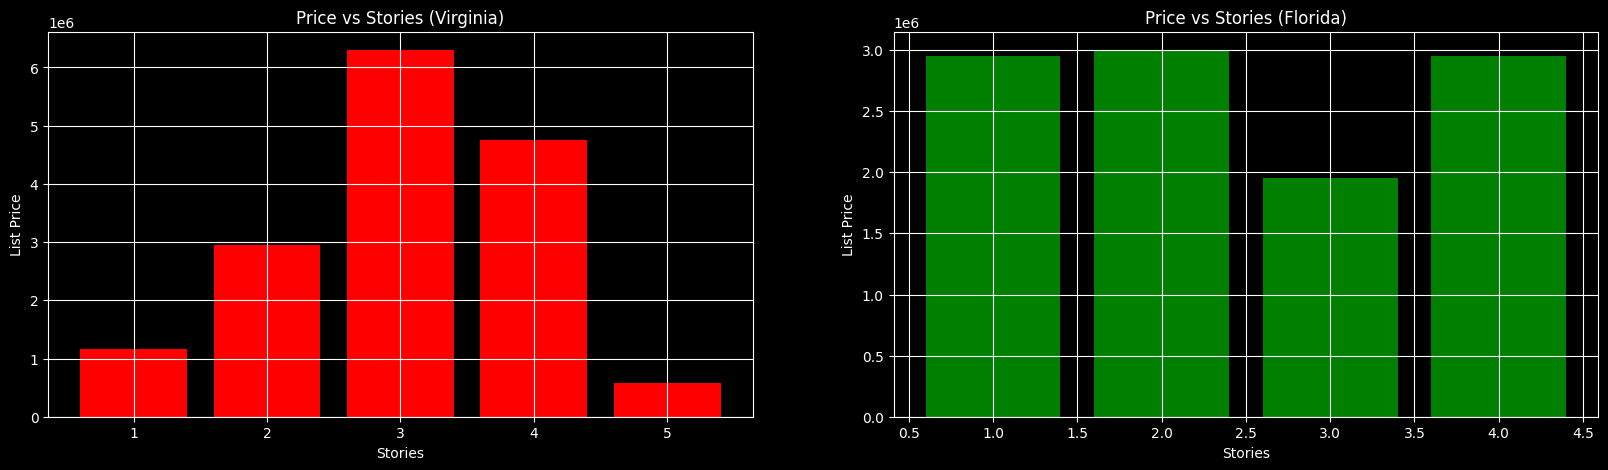

In [699]:
# visualizing stories vs listprice

fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].bar(df_vir['stories'], df_vir['listPrice'], color='red')
axs[0].set_xlabel('Stories')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Stories (Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['stories'], df_flo['listPrice'], color='green')
axs[1].set_xlabel('Stories')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Stories (Florida)')
axs[1].grid(True)


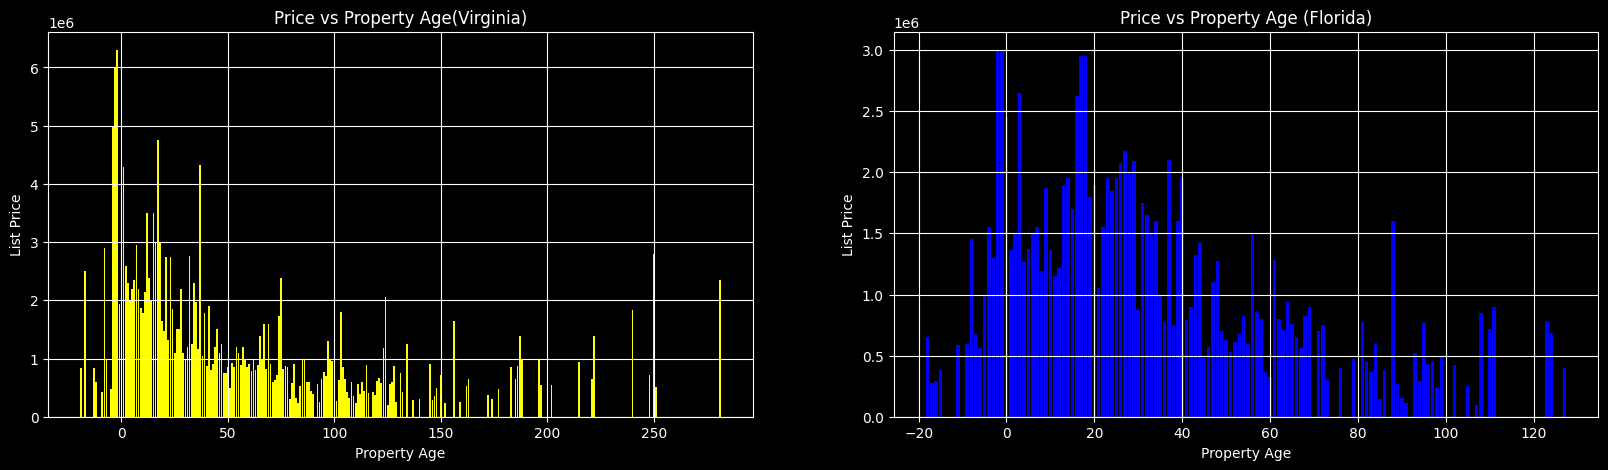

In [700]:
# visualizing property age vs listprice

fig, axs = plt.subplots(1,2,figsize=(20,5))
axs[0].bar(df_vir['property_age'], df_vir['listPrice'], color='yellow')
axs[0].set_xlabel('Property Age')
axs[0].set_ylabel('List Price')
axs[0].set_title('Price vs Property Age(Virginia)')
axs[0].grid(True)


axs[1].bar(df_flo['property_age'], df_flo['listPrice'], color='blue')
axs[1].set_xlabel('Property Age')
axs[1].set_ylabel('List Price')
axs[1].set_title('Price vs Property Age (Florida)')
axs[1].grid(True)

In [ ]:
# dropping price per sqft